loaded the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.mixture import BayesianGaussianMixture
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.neighbors.kde import KernelDensity
from sklearn.model_selection import GridSearchCV


loaded complete training set to view and added a new column number to represent what each pixel represents.

In [2]:
def load_data(type_of_data):
    for i in range(0,10):
        x=type_of_data+str(i)+".csv"
        DF0= pd.read_csv(x)
        DF0=DF0.ix[:,'V1':]
        a=DF0['V1'].count()
        a=[i]*a
        a = pd.DataFrame(a, columns = list("n"))
        DF0 = pd.concat([a.reset_index(drop=True), DF0], axis=1)
        DF0[1:5]
        if i==0:
            DF=DF0
            DF.shape
        else:
            frames = [DF, DF0]
            DF = pd.concat(frames)
            DF.shape
        DF=DF[DF['n'].notnull()]
    return DF
  


removed the null rows and checked the data.

In [3]:
train=load_data("train")
test=load_data("test")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Idnetify the NUll rows in the dataset

In [6]:
test[test['n'].isnull()]
#DF[DF['V1'].isnull()]

,n,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V775,V776,V777,V778,V779,V780,V781,V782,V783,V784


Checked the unique enteries for the representaion column.

In [7]:
np.unique(train['n'])

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

performed LDA for 9 componenets and view the first and second componenet data.

In [4]:
np.random.seed(1234)


In [5]:
model_lda = LinearDiscriminantAnalysis(solver='eigen', shrinkage = 'auto')

In [6]:

data_projected = model_lda.fit(train.ix[:,'V1':], train['n'])
#LDA_1 = pd.DataFrame({"n":train['n'],"comp1": data_projected[:,0],"comp2":data_projected[:,1],"comp3":data_projected[:,2]
 #                     ,"comp4":data_projected[:,3],"comp5":data_projected[:,4],"comp6":data_projected[:,5],
  #                    "comp7":data_projected[:,6],"comp8":data_projected[:,7],"comp9":data_projected[:,8],})

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


In [7]:
data_projected.explained_variance_ratio_
#variance_ratio = np.cumsum(np.round(data_projected.explained_variance_ratio_, decimals=3)*100)


array([0.01045367, 0.01044855, 0.01035269, 0.01031199, 0.01016868,
       0.0101242 , 0.01003415, 0.00977172, 0.00938958])

In [17]:
variance_ratio

array([ 24.2,  44.3,  62. ,  72.6,  82.1,  89. ,  93.9,  97.4, 100.1])

In [8]:
model_lda = LinearDiscriminantAnalysis(n_components=9)

data_projected = model_lda.fit_transform(train.ix[:,'V1':], train['n'])
LDA_1 = pd.DataFrame({"n":train['n'],"comp1": data_projected[:,0],"comp2":data_projected[:,1],"comp3":data_projected[:,2]
                      ,"comp4":data_projected[:,3],"comp5":data_projected[:,4],"comp6":data_projected[:,5],
                     "comp7":data_projected[:,6],"comp8":data_projected[:,7],"comp9":data_projected[:,8],})


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


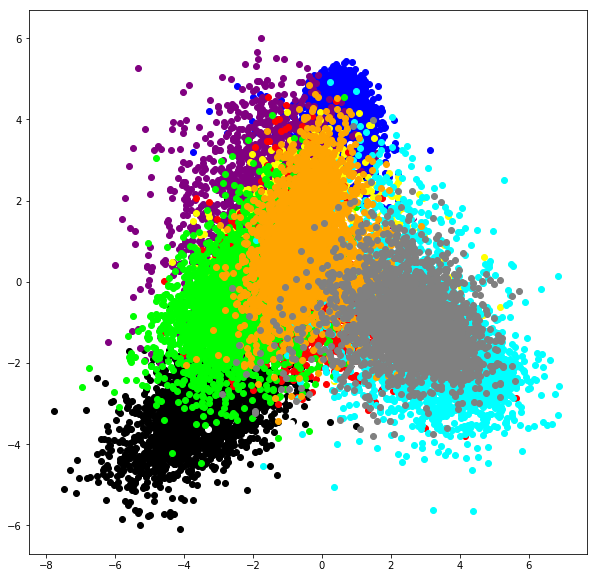

In [9]:

colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
for l,c in zip(np.unique(train['n']),colors):
    ax0.scatter(data_projected[:,0][train['n']==l],data_projected[:,1][train['n']==l],c=c)

lets work on PCA

In [10]:
PCA_30 = PCA(n_components = 9)
PCA_30.fit = PCA_30.fit_transform(train.ix[:,'V1':])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [13]:
PCA_30

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
PCA_1 = pd.DataFrame({"n":train['n'],"comp1": PCA_30.fit[:,0],
                      "comp2":PCA_30.fit[:,1],"comp3":PCA_30.fit[:,2],
                      "comp4":PCA_30.fit[:,3],
                      "comp5":PCA_30.fit[:,4],"comp6":PCA_30.fit[:,5],"comp7":PCA_30.fit[:,6],
                      "comp8":PCA_30.fit[:,7],"comp9":PCA_30.fit[:,8],})




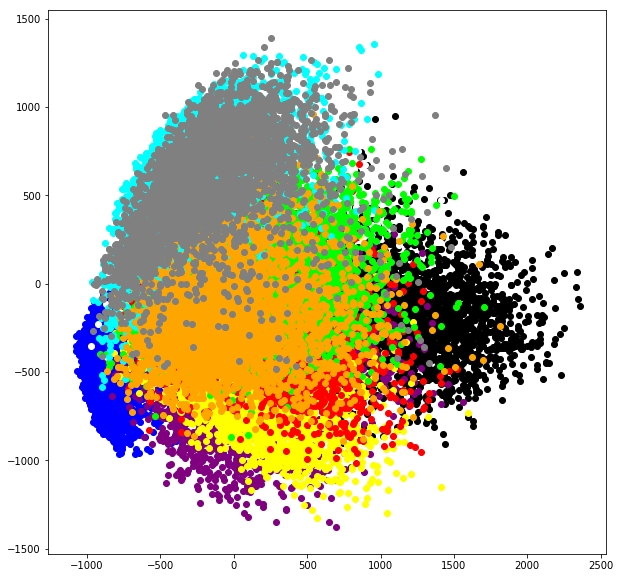

In [16]:

colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange',
          'gray']
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
for l,c in zip(np.unique(train['n']),colors):
    ax0.scatter(PCA_30.fit[:,0][train['n']==l],PCA_30.fit[:,1][train['n']==l],c=c)

In [12]:
variance = PCA_30.explained_variance_ratio_

print('Explained variation per principal component: {0}'.format(variance))

print("\n")

# calculate variance ratios
variance_ratio = np.cumsum(np.round(variance, decimals=3)*100)

print('Explained cumulative variation for 30 principal components: {0}'.format(variance_ratio))

Explained variation per principal component: [0.09694147 0.07117981 0.06152888 0.05384314 0.04886116 0.04308593
 0.03283892 0.02875152 0.02745918]


Explained cumulative variation for 30 principal components: [ 9.7 16.8 23.  28.4 33.3 37.6 40.9 43.8 46.5]


In [13]:
LDA_proj = model_lda.transform(test.ix[:,'V1':])
LDA_test = pd.DataFrame({"n":test['n'],"comp1": LDA_proj[:,0],"comp2":LDA_proj[:,1],"comp3":LDA_proj[:,2]
                      ,"comp4":LDA_proj[:,3],"comp5":LDA_proj[:,4],"comp6":LDA_proj[:,5],
                      "comp7":LDA_proj[:,6],"comp8":LDA_proj[:,7],"comp9":LDA_proj[:,8],})
PCA_proj = PCA_30.transform(test.ix[:,'V1':])
PCA_test = pd.DataFrame({"n":test['n'],"comp1": PCA_proj[:,0],"comp2":PCA_proj[:,1],"comp3":PCA_proj[:,2]
                      ,"comp4":PCA_proj[:,3],"comp5":PCA_proj[:,4],"comp6":PCA_proj[:,5],
                      "comp7":PCA_proj[:,6],"comp8":PCA_proj[:,7],"comp9":PCA_proj[:,8],})

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [19]:
PCA_test[1:15]

,n,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9
1,0.0,1204.398264,-241.712712,220.728313,-761.607559,-239.975810,-64.883751,-142.705668,-81.915181,741.859892
2,0.0,206.980485,-538.754811,-475.071071,276.061042,-826.359024,598.676608,-75.157766,61.530887,-267.810921
3,0.0,1244.722309,-172.721737,375.179150,-575.202586,163.032858,-401.381358,32.629740,155.779789,-185.848796
4,0.0,445.099951,-422.429611,-359.411315,419.069307,-798.611035,532.833480,237.958239,-133.054935,-37.395204
5,0.0,1386.450434,-313.806768,876.223027,-719.954343,-796.968461,-22.643604,-116.088358,241.086541,512.083548
6,0.0,1543.187765,-785.973589,-381.107112,164.166746,-714.748007,626.349815,338.047630,-646.136334,-100.568809
7,0.0,778.598402,-48.863778,61.442295,-131.039413,-1125.412360,227.582642,32.147961,-241.401579,83.058351
8,0.0,1232.550814,-124.616439,362.363757,151.842411,-304.482685,-296.258524,-125.030545,-97.564776,-162.730375
9,0.0,923.363860,-432.916889,-590.397144,69.099003,-886.202449,825.945068,363.549686,-318.857635,-140.987017
10,0.0,1722.852767,-461.772691,-212.664494,398.347294,-719.118235,683.944519,182.169937,-664.305280,16.621079


First Model : Bayesian Gaussian MIxture with Diagonal Variance

In [15]:
model1 = BayesianGaussianMixture(n_components=100, covariance_type='diag')
fit_lda=model1.fit(LDA_1.ix[:,'comp1':], LDA_1['n'])
#fit_lda.sigma_

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/anaconda3/lib/python3.6/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


In [16]:

model2 = BayesianGaussianMixture(n_components=10, covariance_type='diag')
fit_pca=model2.fit(PCA_1.ix[:,'comp1':], PCA_1['n'])
#fit_pca.sigma_

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


In [17]:
PCA_1['predicted']=fit_pca.predict(PCA_1.ix[:,'comp1':])
LDA_1['predicted']=fit_lda.predict(LDA_1.ix[:,'comp1':])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [18]:
PCA_test['predicted']=fit_pca.predict(PCA_test.ix[:,'comp1':])
LDA_test['predicted']=fit_lda.predict(LDA_test.ix[:,'comp1':])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [19]:
print('accuracy for LDA training data set',accuracy_score(LDA_1['n'], LDA_1['predicted'], normalize=True, sample_weight=None))
print('accuracy for PCA training data set',accuracy_score(PCA_1['n'], PCA_1['predicted'], normalize=True, sample_weight=None))
print('accuracy for LDA testing data set',accuracy_score(LDA_test['n'], LDA_test['predicted'], normalize=True, sample_weight=None))
print('accuracy for PCA testing data set',accuracy_score(PCA_test['n'], PCA_test['predicted'], normalize=True, sample_weight=None))

#LDA_test[LDA_test['n']!=LDA_test['predicted']]
#for x in range(10):
#    accuracy_pca=accuracy_pca+PCA_op[x,x]
#accuracy_pca_ratio=accuracy_pca/DF_name.shape[0] 
    #return accuracy_pca_ratio

accuracy for LDA training data set 0.008391608391608392
accuracy for PCA training data set 0.2403076923076923
accuracy for LDA testing data set 0.006474226804123712
accuracy for PCA testing data set 0.23847422680412372


In [29]:
PCA_1.n.unique()

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

Bayessian Gaussian Misxture our second model with Full Vairiance

In [20]:
model3 = BayesianGaussianMixture(n_components=10, covariance_type='full')
fit_lda2=model3.fit(LDA_1.ix[:,'comp1':], LDA_1['n'])

model4 = BayesianGaussianMixture(n_components=10, covariance_type='full')
fit_pca2=model4.fit(PCA_1.ix[:,'comp1':], PCA_1['n'])
PCA_1['predicted']=fit_pca2.predict(PCA_1.ix[:,'comp1':])
LDA_1['predicted']=fit_lda2.predict(LDA_1.ix[:,'comp1':])
PCA_test['predicted']=fit_pca2.predict(PCA_test.ix[:,'comp1':])
LDA_test['predicted']=fit_lda2.predict(LDA_test.ix[:,'comp1':])


print('accuracy for LDA training data set',accuracy_score(LDA_1['n'], LDA_1['predicted'], normalize=True, sample_weight=None))
print('accuracy for LDA testing data set',accuracy_score(LDA_test['n'], LDA_test['predicted'], normalize=True, sample_weight=None))
print('accuracy for PCA training data set',accuracy_score(PCA_1['n'], PCA_1['predicted'], normalize=True, sample_weight=None))

print('accuracy for PCA testing data set',accuracy_score(PCA_test['n'], PCA_test['predicted'], normalize=True, sample_weight=None))


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/anaconda3/lib/python3.6/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positio

accuracy for LDA training data set 0.05916083916083916
accuracy for LDA testing data set 0.060824742268041236
accuracy for PCA training data set 0.05367832167832168
accuracy for PCA testing data set 0.05517525773195876


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


Model 3: Kmeans with K values from 1 to 19

In [21]:
#PCA_1.drop(columns=['predicted'])
#PCA_test.drop(columns=['predicted'])
Kmean_accu =pd.DataFrame({'K': [0], 'test_accuracy': [0],'train_accuracy':[0]})
for i in list(range(1, 19, 2)):
    #print(i)
    classifier = KNeighborsClassifier(n_neighbors=i)  
    Kmean_pca=classifier.fit(PCA_1.ix[:,'comp1':], PCA_1['n'])
    PCA_1['predicted']=Kmean_pca.predict(PCA_1.ix[:,'comp1':])
    PCA_test['predicted']=Kmean_pca.predict(PCA_test.ix[:,'comp1':])
    Kmean_accu = Kmean_accu.append({'K': i,'test_accuracy':accuracy_score(PCA_test['n'], PCA_test['predicted'],normalize=True, sample_weight=None)
                                            ,'train_accuracy':accuracy_score(PCA_1['n'], PCA_1['predicted'],normalize=True, sample_weight=None)
                                              }, ignore_index=True)
    print('accuracy for K Neareast testing data set for K:',i," accuracy:",accuracy_score(PCA_test['n'], PCA_test['predicted'],
                                                             normalize=True, sample_weight=None))
    print('accuracy for K nearest training data set for K:',i, " accuracy",accuracy_score(PCA_1['n'], PCA_1['predicted'],
                                                            normalize=True, sample_weight=None))



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


accuracy for K Neareast testing data set for K: 1  accuracy: 0.8941443298969072
accuracy for K nearest training data set for K: 1  accuracy 1.0
accuracy for K Neareast testing data set for K: 3  accuracy: 0.9088247422680412
accuracy for K nearest training data set for K: 3  accuracy 0.9487832167832168
accuracy for K Neareast testing data set for K: 5  accuracy: 0.9138969072164949
accuracy for K nearest training data set for K: 5  accuracy 0.9382657342657342
accuracy for K Neareast testing data set for K: 7  accuracy: 0.9138969072164949
accuracy for K nearest training data set for K: 7  accuracy 0.9335384615384615
accuracy for K Neareast testing data set for K: 9  accuracy: 0.9150515463917526
accuracy for K nearest training data set for K: 9  accuracy 0.9286153846153846
accuracy for K Neareast testing data set for K: 11  accuracy: 0.9137319587628866
accuracy for K nearest training data set for K: 11  accuracy 0.9253706293706294
accuracy for K Neareast testing data set for K: 13  accurac

In [23]:
#LDA_1.drop(columns=['predicted'])
#LDA_test.drop(columns=['predicted'])
Kmean_accu_lda =pd.DataFrame({'K': [0], 'test_accuracy': [0],'train_accuracy':[0]})
for i in list(range(1, 19, 2)):
    #print(i)
    classifier = KNeighborsClassifier(n_neighbors=i)  
    Kmean_lda=classifier.fit(LDA_1.ix[:,'comp1':], LDA_1['n'])
    LDA_1['predicted']=Kmean_lda.predict(LDA_1.ix[:,'comp1':])
    LDA_test['predicted']=Kmean_lda.predict(LDA_test.ix[:,'comp1':])
    Kmean_accu_lda = Kmean_accu_lda.append({'K': i,'test_accuracy':accuracy_score(LDA_test['n'], LDA_test['predicted'],normalize=True, sample_weight=None)
                                            ,'train_accuracy':accuracy_score(LDA_1['n'], LDA_1['predicted'],normalize=True, sample_weight=None)
                                              }, ignore_index=True)
    #print('accuracy for K Neareast testing data set for K:',i," accuracy:",accuracy_score(PCA_test['n'], PCA_test['predicted'],
     #                                                        normalize=True, sample_weight=None))
    #print('accuracy for K nearest training data set for K:',i, " accuracy",accuracy_score(PCA_1['n'], PCA_1['predicted'],
     #                                                        normalize=True, sample_weight=None))



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [24]:
Kmean_accu_lda

,K,test_accuracy,train_accuracy
0,0.0,0.000000,0.000000
1,1.0,0.894515,1.000000
2,3.0,0.896577,0.993510
3,5.0,0.898062,0.990294
4,7.0,0.898887,0.988084
5,9.0,0.898928,0.986517
6,11.0,0.899093,0.985371
7,13.0,0.899175,0.984364
8,15.0,0.899258,0.983552
9,17.0,0.899216,0.982629


Parzen window estimation with the bandwidth changinfg scenario to look at the accuracy.

In [25]:



grid = GridSearchCV(KernelDensity(), {'bandwidth': np.logspace(-0.5, 0.5, 20)}, cv=5)
grid.fit(PCA_1.ix[:,'comp1':])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


GridSearchCV(cv=5, error_score='raise',
       estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'bandwidth': array([0.31623, 0.35697, 0.40296, 0.45488, 0.51348, 0.57964, 0.65432,
       0.73862, 0.83378, 0.9412 , 1.06247, 1.19935, 1.35388, 1.52831,
       1.72521, 1.94748, 2.19839, 2.48163, 2.80136, 3.16228])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:
grid.best_estimator_

KernelDensity(algorithm='auto', atol=0, bandwidth=3.1622776601683795,
       breadth_first=True, kernel='gaussian', leaf_size=40,
       metric='euclidean', metric_params=None, rtol=0)

In [30]:
grid.best_estimator_
print(grid.best_params_)

{'bandwidth': 3.1622776601683795}


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


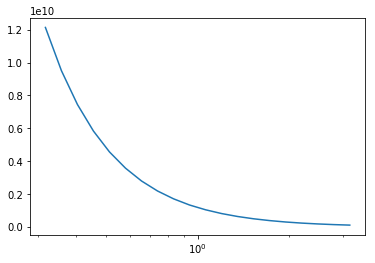

In [26]:
scores = [-val.mean_validation_score for val in grid.grid_scores_]

bandwidths=np.logspace(-0.5, 0.5, 20)
plt.semilogx(bandwidths, scores)

In [39]:
grid.grid_scores_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -12131250069.16488, std: 2045687933.27502, params: {'bandwidth': 0.31622776601683794},
 mean: -9508729252.87449, std: 1605215574.57857, params: {'bandwidth': 0.3569698846826065},
 mean: -7453231025.46410, std: 1263403750.22672, params: {'bandwidth': 0.4029611320200401},
 mean: -5835467984.14715, std: 991664791.80473, params: {'bandwidth': 0.4548777947003777},
 mean: -4565036308.46111, std: 783666979.36600, params: {'bandwidth': 0.5134832907437552},
 mean: -3569186127.89179, std: 617410794.28472, params: {'bandwidth': 0.5796393953384968},
 mean: -2793972309.53705, std: 480504758.58437, params: {'bandwidth': 0.6543189129712967},
 mean: -2184418802.31727, std: 377383820.34110, params: {'bandwidth': 0.7386199822079361},
 mean: -1708046552.55435, std: 300250850.98250, params: {'bandwidth': 0.8337822234717891},
 mean: -1331725590.11333, std: 235045588.61221, params: {'bandwidth': 0.9412049672680667},
 mean: -1039193831.52571, std: 183902209.50225, params: {'bandwidth': 1.0624678308940

In [ ]:


grid_Lda = GridSearchCV(KernelDensity(), {'bandwidth': np.logspace(-0.5, 0.5, 20)}, cv=5)
grid_Lda.fit(LDA_1.ix[:,'comp1':])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [ ]:
scores = [val.mean_validation_score for val in grid.grid_scores_]

bandwidths=np.logspace(-0.5, 0.5, 20)
plt.semilogx(bandwidths, scores)

In [ ]:
grid.best_estimator_
print(grid.best_params_)